# Opus 4 Extended Charts

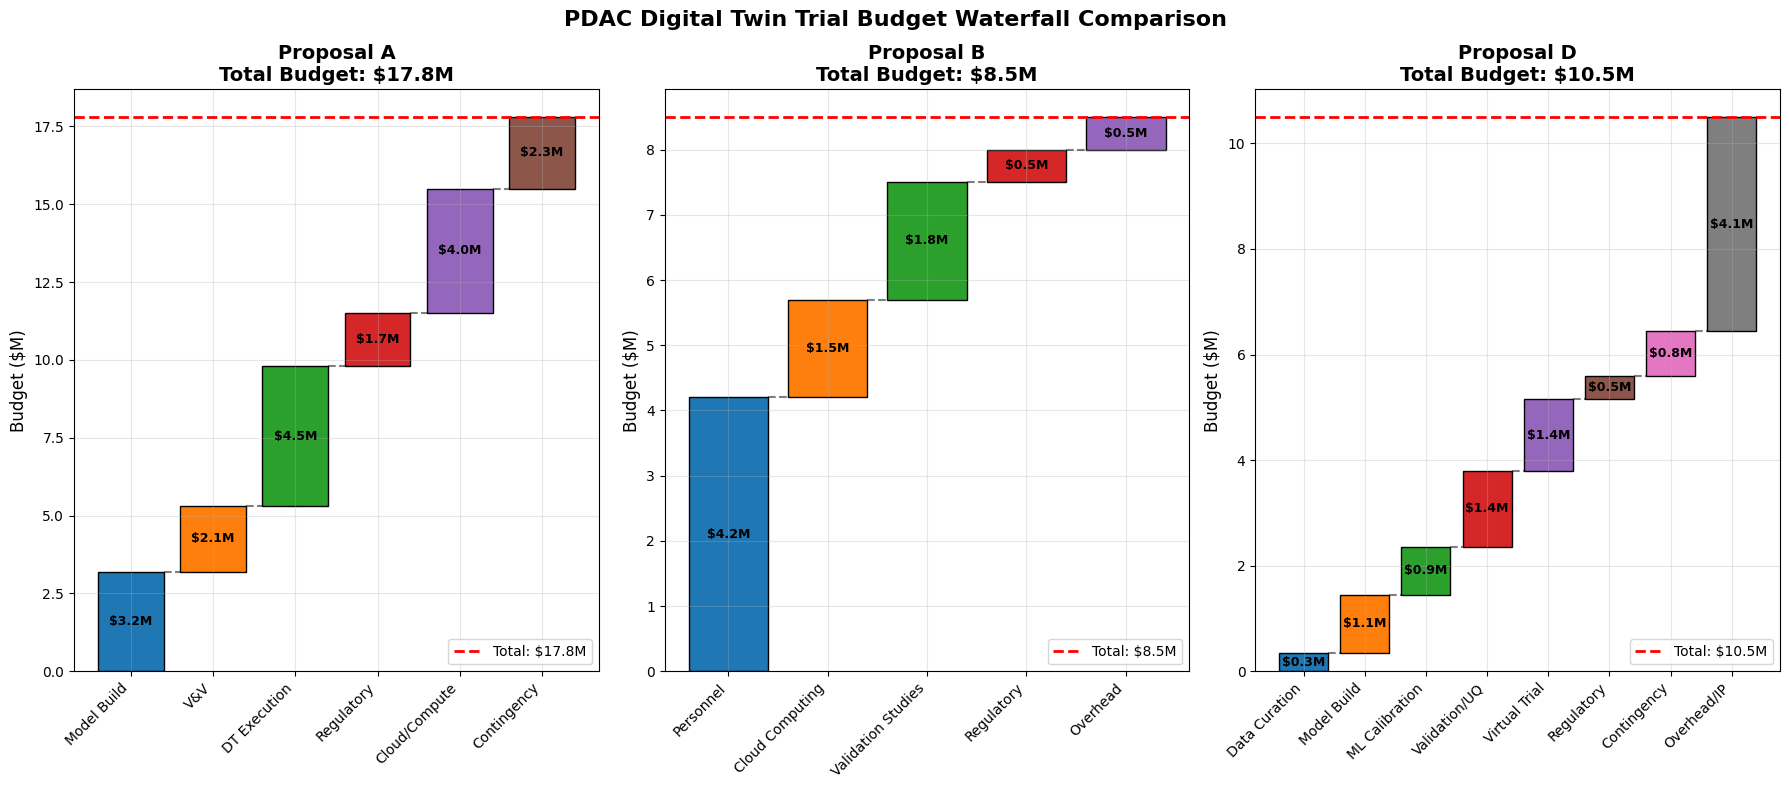

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Budget data from proposals
proposals = ['Proposal A', 'Proposal B', 'Proposal D']
total_budgets = [17.8, 8.5, 10.5]

# Detailed budget breakdown
budget_data = {
    'Proposal A': {
        'Model Build': 3.2,
        'V&V': 2.1,
        'DT Execution': 4.5,
        'Regulatory': 1.7,
        'Cloud/Compute': 4.0,
        'Contingency': 2.3
    },
    'Proposal B': {
        'Personnel': 4.2,
        'Cloud Computing': 1.5,
        'Validation Studies': 1.8,
        'Regulatory': 0.5,
        'Overhead': 0.5
    },
    'Proposal D': {
        'Data Curation': 0.35,
        'Model Build': 1.1,
        'ML Calibration': 0.9,
        'Validation/UQ': 1.45,
        'Virtual Trial': 1.35,
        'Regulatory': 0.45,
        'Contingency': 0.84,
        'Overhead/IP': 4.06
    }
}

fig, axes = plt.subplots(1, 3, figsize=(18, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

for idx, (proposal, ax) in enumerate(zip(proposals, axes)):
    data = budget_data[proposal]
    categories = list(data.keys())
    values = list(data.values())

    # Calculate cumulative values for waterfall
    cumulative = np.cumsum([0] + values)

    # Create waterfall chart
    for i, (cat, val) in enumerate(zip(categories, values)):
        ax.bar(i, val, bottom=cumulative[i], color=colors[i % len(colors)],
               edgecolor='black', linewidth=1)

        # Add value labels
        ax.text(i, cumulative[i] + val/2, f'${val:.1f}M',
                ha='center', va='center', fontsize=9, fontweight='bold')

        # Add connecting lines
        if i < len(categories) - 1:
            ax.plot([i+0.4, i+0.6], [cumulative[i+1], cumulative[i+1]],
                   'k--', alpha=0.5)

    # Add total line
    ax.axhline(y=total_budgets[idx], color='red', linestyle='--',
               linewidth=2, label=f'Total: ${total_budgets[idx]}M')

    ax.set_title(f'{proposal}\nTotal Budget: ${total_budgets[idx]}M',
                 fontsize=14, fontweight='bold')
    ax.set_ylabel('Budget ($M)', fontsize=12)
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('PDAC Digital Twin Trial Budget Waterfall Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

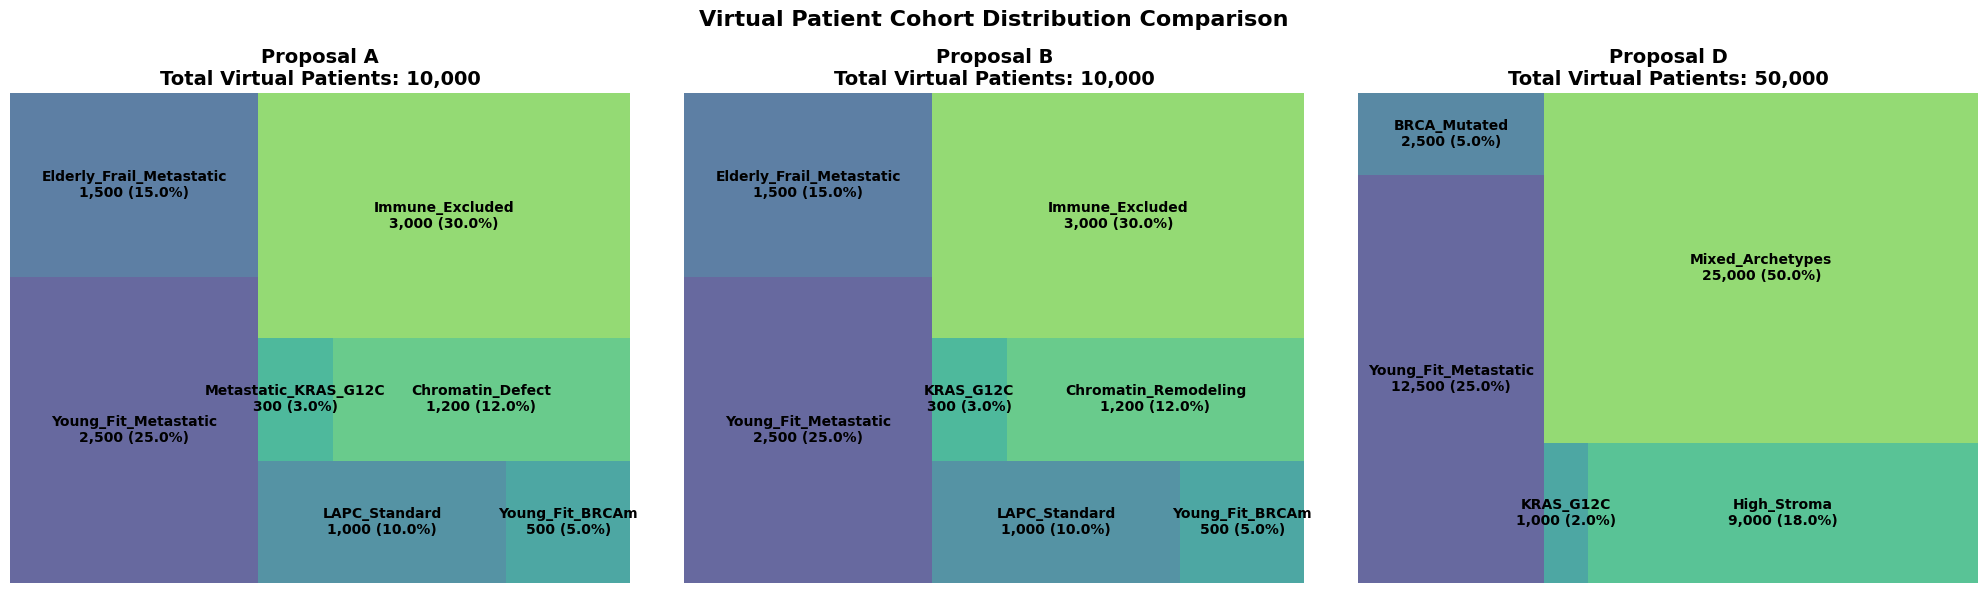

In [3]:
!pip install squarify

import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Virtual patient cohort data
cohort_data = {
    'Proposal A': {
        'Archetypes': {
            'Young_Fit_Metastatic': 2500,
            'Elderly_Frail_Metastatic': 1500,
            'LAPC_Standard': 1000,
            'Young_Fit_BRCAm': 500,
            'Metastatic_KRAS_G12C': 300,
            'Chromatin_Defect': 1200,
            'Immune_Excluded': 3000
        },
        'Total': 10000
    },
    'Proposal B': {
        'Archetypes': {
            'Young_Fit_Metastatic': 2500,
            'Elderly_Frail_Metastatic': 1500,
            'LAPC_Standard': 1000,
            'Young_Fit_BRCAm': 500,
            'KRAS_G12C': 300,
            'Chromatin_Remodeling': 1200,
            'Immune_Excluded': 3000
        },
        'Total': 10000
    },
    'Proposal D': {
        'Archetypes': {
            'Young_Fit_Metastatic': 12500,
            'BRCA_Mutated': 2500,
            'KRAS_G12C': 1000,
            'High_Stroma': 9000,
            'Mixed_Archetypes': 25000
        },
        'Total': 50000
    }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (proposal, ax) in enumerate(zip(['Proposal A', 'Proposal B', 'Proposal D'], axes)):
    data = cohort_data[proposal]['Archetypes']
    labels = [f"{k}\n{v:,} ({v/cohort_data[proposal]['Total']*100:.1f}%)"
              for k, v in data.items()]
    sizes = list(data.values())

    # Color scheme based on size
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(sizes)))

    squarify.plot(sizes=sizes, label=labels, ax=ax, color=colors,
                  alpha=0.8, text_kwargs={'fontsize': 10, 'fontweight': 'bold'})

    ax.set_title(f'{proposal}\nTotal Virtual Patients: {cohort_data[proposal]["Total"]:,}',
                 fontsize=14, fontweight='bold')
    ax.axis('off')

plt.suptitle('Virtual Patient Cohort Distribution Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

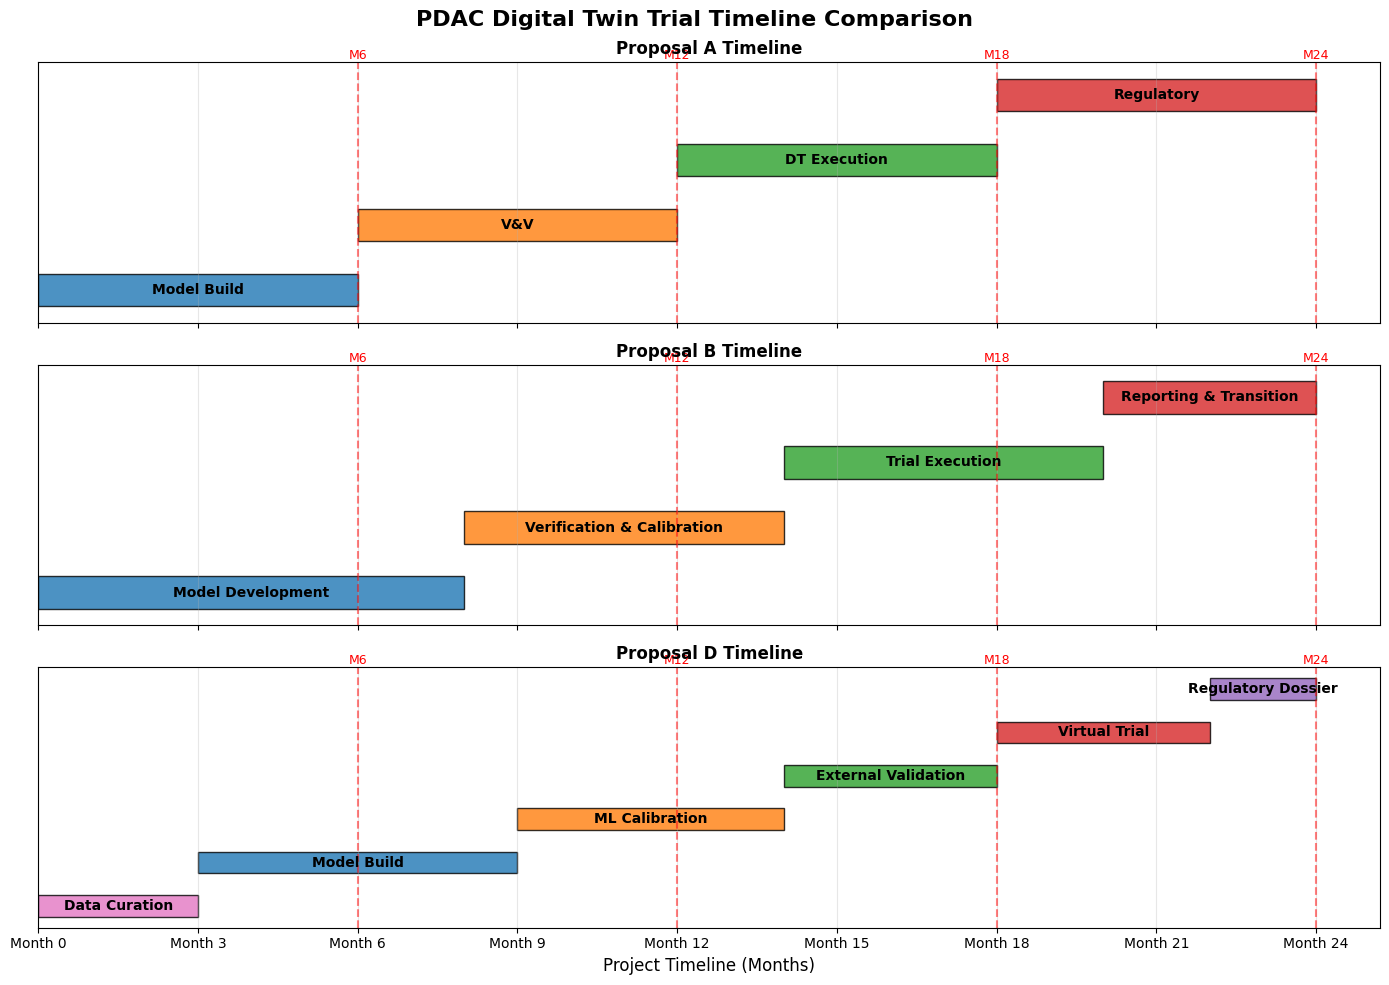

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import pandas as pd

# Timeline data for each proposal
timeline_data = {
    'Proposal A': [
        {'Task': 'Model Build', 'Start': 0, 'Duration': 6, 'Color': '#1f77b4'},
        {'Task': 'V&V', 'Start': 6, 'Duration': 6, 'Color': '#ff7f0e'},
        {'Task': 'DT Execution', 'Start': 12, 'Duration': 6, 'Color': '#2ca02c'},
        {'Task': 'Regulatory', 'Start': 18, 'Duration': 6, 'Color': '#d62728'}
    ],
    'Proposal B': [
        {'Task': 'Model Development', 'Start': 0, 'Duration': 8, 'Color': '#1f77b4'},
        {'Task': 'Verification & Calibration', 'Start': 8, 'Duration': 6, 'Color': '#ff7f0e'},
        {'Task': 'Trial Execution', 'Start': 14, 'Duration': 6, 'Color': '#2ca02c'},
        {'Task': 'Reporting & Transition', 'Start': 20, 'Duration': 4, 'Color': '#d62728'}
    ],
    'Proposal D': [
        {'Task': 'Data Curation', 'Start': 0, 'Duration': 3, 'Color': '#e377c2'},
        {'Task': 'Model Build', 'Start': 3, 'Duration': 6, 'Color': '#1f77b4'},
        {'Task': 'ML Calibration', 'Start': 9, 'Duration': 5, 'Color': '#ff7f0e'},
        {'Task': 'External Validation', 'Start': 14, 'Duration': 4, 'Color': '#2ca02c'},
        {'Task': 'Virtual Trial', 'Start': 18, 'Duration': 4, 'Color': '#d62728'},
        {'Task': 'Regulatory Dossier', 'Start': 22, 'Duration': 2, 'Color': '#9467bd'}
    ]
}

fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
start_date = datetime(2025, 7, 1)

for ax, (proposal, tasks) in zip(axes, timeline_data.items()):
    y_pos = 0

    for task in tasks:
        start = start_date + timedelta(days=task['Start'] * 30)
        end = start + timedelta(days=task['Duration'] * 30)

        ax.barh(y_pos, task['Duration'] * 30, left=task['Start'] * 30,
                height=0.5, color=task['Color'], alpha=0.8,
                edgecolor='black', linewidth=1)

        # Add task labels
        ax.text(task['Start'] * 30 + task['Duration'] * 15, y_pos,
                task['Task'], ha='center', va='center',
                fontsize=10, fontweight='bold')

        y_pos += 1

    # Add milestones
    milestones = [6, 12, 18, 24]
    for m in milestones:
        ax.axvline(x=m * 30, color='red', linestyle='--', alpha=0.5)
        ax.text(m * 30, y_pos - 0.5, f'M{m}', ha='center', va='bottom',
                color='red', fontsize=9)

    ax.set_ylim(-0.5, y_pos - 0.5)
    ax.set_yticks([])
    ax.set_title(f'{proposal} Timeline', fontsize=12, fontweight='bold')
    ax.grid(True, axis='x', alpha=0.3)

axes[-1].set_xlabel('Project Timeline (Months)', fontsize=12)
axes[-1].set_xticks([i * 30 for i in range(0, 25, 3)])
axes[-1].set_xticklabels([f'Month {i}' for i in range(0, 25, 3)])

plt.suptitle('PDAC Digital Twin Trial Timeline Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

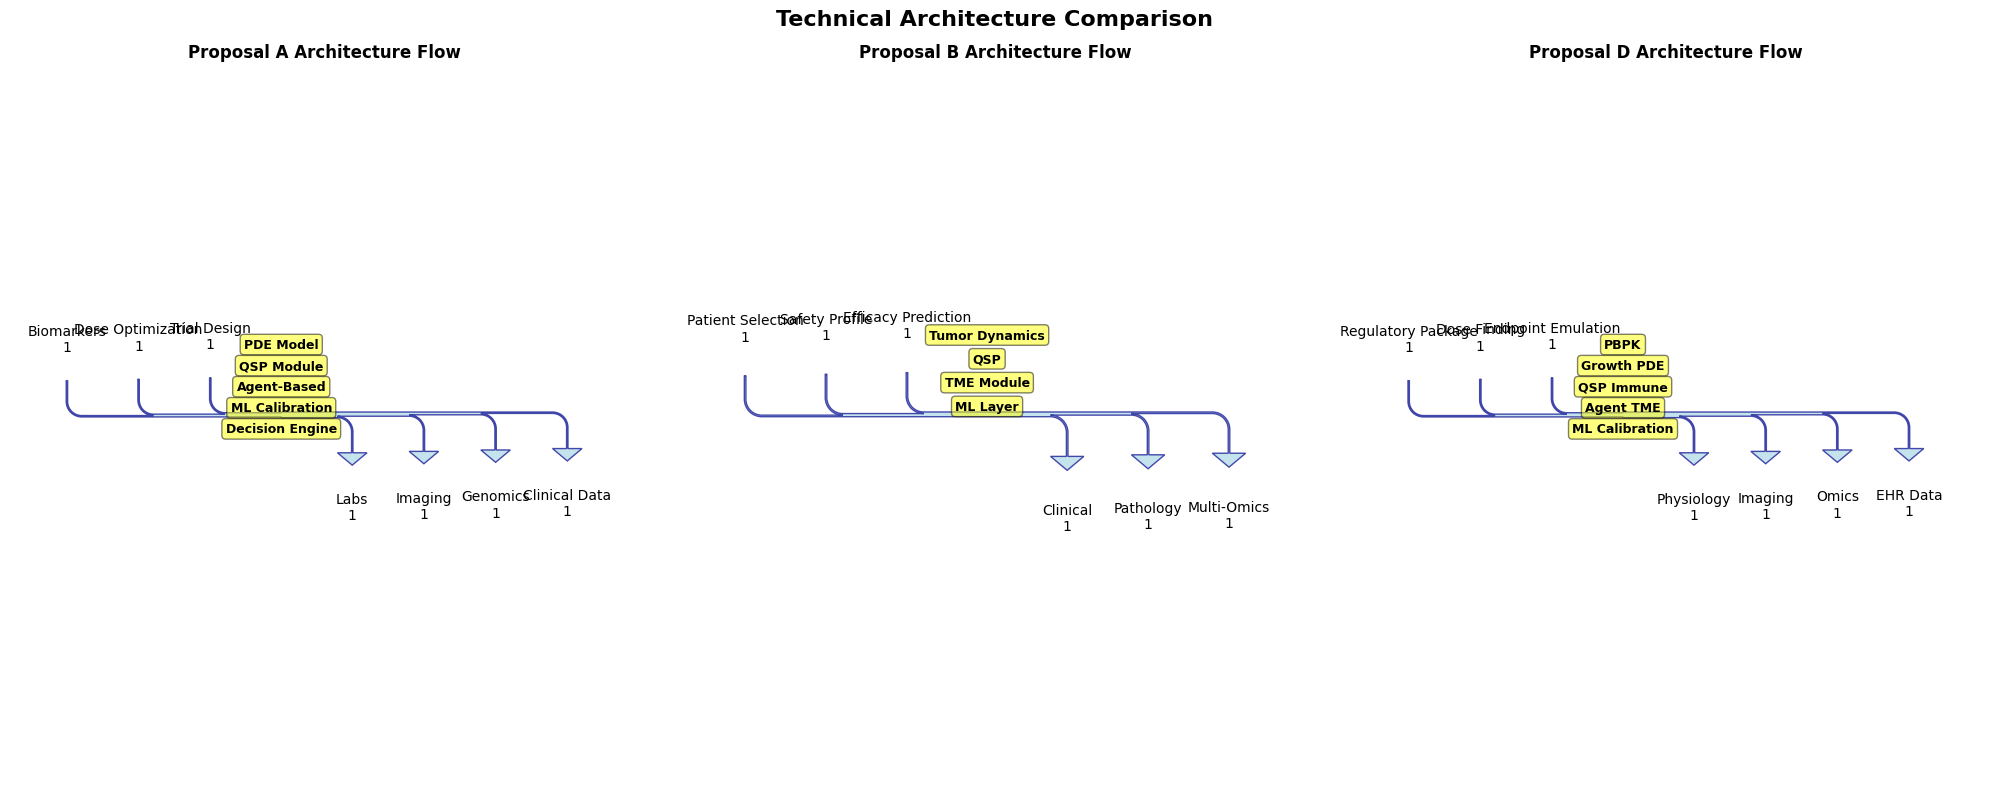

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.sankey import Sankey

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Architecture flows for each proposal
architectures = {
    'Proposal A': {
        'inputs': ['Clinical Data', 'Genomics', 'Imaging', 'Labs'],
        'layers': ['PDE Model', 'QSP Module', 'Agent-Based', 'ML Calibration', 'Decision Engine'],
        'outputs': ['Trial Design', 'Dose Optimization', 'Biomarkers']
    },
    'Proposal B': {
        'inputs': ['Multi-Omics', 'Pathology', 'Clinical'],
        'layers': ['Tumor Dynamics', 'QSP', 'TME Module', 'ML Layer'],
        'outputs': ['Efficacy Prediction', 'Safety Profile', 'Patient Selection']
    },
    'Proposal D': {
        'inputs': ['EHR Data', 'Omics', 'Imaging', 'Physiology'],
        'layers': ['PBPK', 'Growth PDE', 'QSP Immune', 'Agent TME', 'ML Calibration'],
        'outputs': ['Endpoint Emulation', 'Dose Finding', 'Regulatory Package']
    }
}

for ax, (proposal, arch) in zip(axes, architectures.items()):
    sankey = Sankey(ax=ax, scale=0.01, offset=0.3, format='%.0f',
                    gap=0.5, radius=0.1, shoulder=0.1)

    # Create flows
    flows = [-1] * len(arch['inputs']) + [1] * len(arch['outputs'])
    orientations = [-1] * len(arch['inputs']) + [1] * len(arch['outputs'])

    labels = arch['inputs'] + arch['outputs']

    sankey.add(flows=flows, orientations=orientations, labels=labels,
               pathlengths=[0.25] * len(flows), alpha=0.7,
               facecolor='lightblue', edgecolor='darkblue')

    diagrams = sankey.finish()

    # Add middle layer annotations
    y_start = 0.5
    for i, layer in enumerate(arch['layers']):
        y_pos = y_start - i * 0.15
        ax.text(0, y_pos, layer, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.5),
                fontsize=9, fontweight='bold')

    ax.set_title(f'{proposal} Architecture Flow', fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle('Technical Architecture Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

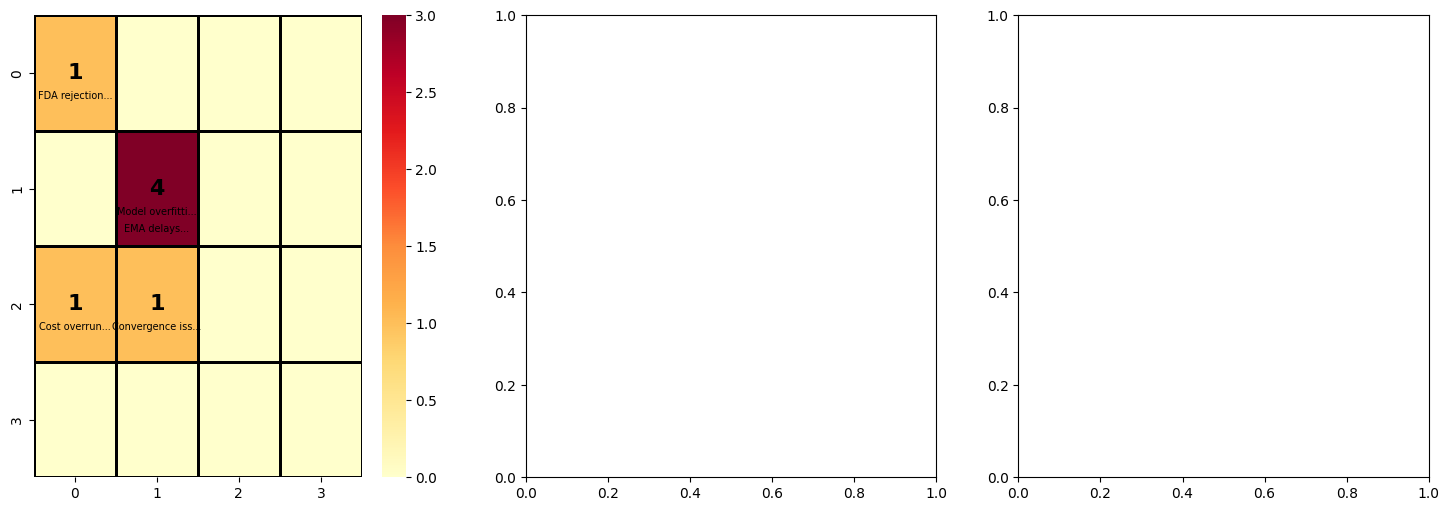

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Risk data for all proposals
risk_data = {
    'Proposal A': {
        'Technical': {'Model overfitting': (2, 2), 'Convergence issues': (1, 2)},
        'Regulatory': {'FDA rejection': (3, 1), 'EMA delays': (2, 2)},
        'Commercial': {'Competitor first': (2, 2), 'Cost overrun': (1, 1)},
        'Data': {'Missing correlations': (2, 2)}
    },
    'Proposal B': {
        'Technical': {'Model complexity': (3, 2), 'Parameter ID': (3, 1)},
        'Regulatory': {'Virtual evidence rejection': (3, 1), 'Qualification delays': (2, 2)},
        'Commercial': {'Competing therapy': (2, 2), 'IP challenges': (1, 1)}
    },
    'Proposal D': {
        'Technical': {'Rare subtype fidelity': (2, 2)},
        'Operational': {'Cloud cost overrun': (1, 3)},
        'Regulatory': {'DT skepticism': (3, 2)},
        'Commercial': {'IP leakage': (3, 1), 'Competitor readout': (2, 1)}
    }
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (proposal, risks) in zip(axes, risk_data.items()):
    # Create risk matrix
    matrix = np.zeros((4, 4))
    annotations = {}

    for category, items in risks.items():
        for risk_name, (impact, likelihood) in items.items():
            matrix[3-impact, likelihood-1] += 1
            if (3-impact, likelihood-1) not in annotations:
                annotations[(3-impact, likelihood-1)] = []
            annotations[(3-impact, likelihood-1)].append(f"{risk_name[:15]}...")

    # Create heatmap
    sns.heatmap(matrix, annot=False, cmap='YlOrRd', cbar=True,
                vmin=0, vmax=3, ax=ax, linewidths=1, linecolor='black')

    # Add risk labels
    for (i, j), risks in annotations.items():
        if matrix[i, j] > 0:
            ax.text(j + 0.5, i + 0.5, f'{int(matrix[i, j])}',
                   ha='center', va='center', fontsize=16, fontweight='bold')
            # Add risk names as small text
            for idx, risk in enumerate(risks[:2]):  # Show max 2 risks per cell
                ax.text(j + 0.5, i + 0.7 + idx*0.15, risk,
                       ha='center', va='center', fontsize=7)

    ax.set_xticklabels(['Low', 'Medium', 'High'], fontsize=10)
    ax.set_yticklabels(['Low', 'Medium', 'High', 'Critical'], fontsize=10)
    ax.set_xlabel('Likelihood', fontsize=11)
    ax.set_ylabel('Impact', fontsize=11)
    ax.set_title(f'{proposal} Risk Matrix', fontsize=12, fontweight='bold')

plt.suptitle('Risk Assessment Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Grok 3 Fix 12Jun25
The error occurs because the heatmap creates a 4x4 grid (from the np.zeros((4, 4)) matrix), but you're trying to set only 3 x-axis labels (['Low', 'Medium', 'High']). The number of labels must match the number of ticks (4 in this case). To fix this, you need to either adjust the matrix size to 3x3 or provide 4 labels for the 4x4 grid.

Since your labels suggest a 3-level likelihood scale ('Low', 'Medium', 'High'), I'll modify the code to use a 3x3 matrix to match the labels. Here's the corrected code:

Changes Made:
Matrix Size: Changed the matrix size from np.zeros((4, 4)) to np.zeros((3, 3)) to match the 3-level scale ('Low', 'Medium', 'High') for both impact and likelihood.
Labels: Updated the y-axis labels to ['Low', 'Medium', 'High'] (removed 'Critical') to match the 3x3 grid.
Impact/Likelihood Bounds: Added logic to ensure impact and likelihood values are clamped between 1 and 3 (min(max(value, 1), 3)) to prevent index errors if any values exceed the 3x3 grid.
Explanation of Fix:
The original error was due to a mismatch between the 4x4 grid (implying 4 ticks) and the 3 labels provided for the x-axis.
By using a 3x3 matrix, the number of ticks (3) matches the number of labels (3), resolving the ValueError.
The y-axis labels were adjusted to reflect a 3-level impact scale, consistent with the data and labels provided.
This code should now run without errors and produce heatmaps for the risk matrices of the three proposals, with appropriate labels and annotations.

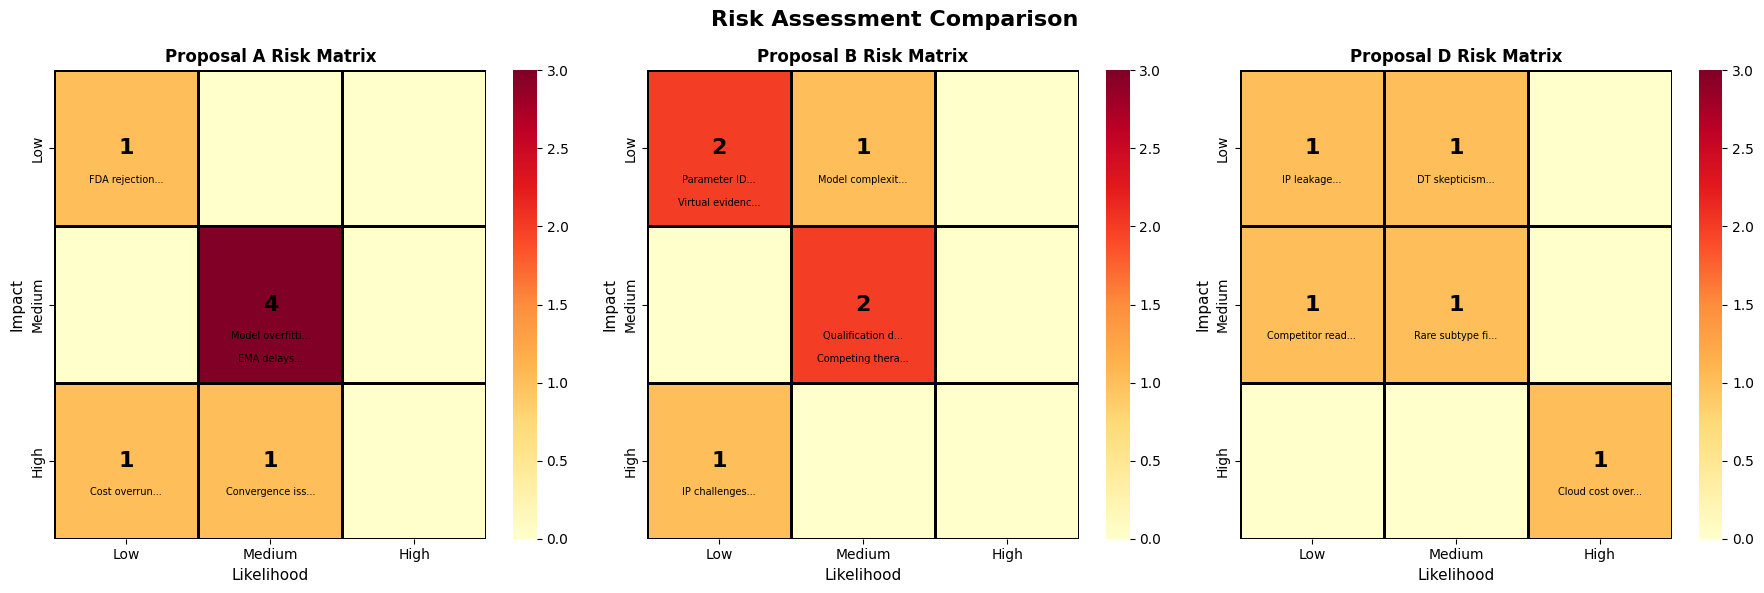

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Risk data for all proposals
risk_data = {
    'Proposal A': {
        'Technical': {'Model overfitting': (2, 2), 'Convergence issues': (1, 2)},
        'Regulatory': {'FDA rejection': (3, 1), 'EMA delays': (2, 2)},
        'Commercial': {'Competitor first': (2, 2), 'Cost overrun': (1, 1)},
        'Data': {'Missing correlations': (2, 2)}
    },
    'Proposal B': {
        'Technical': {'Model complexity': (3, 2), 'Parameter ID': (3, 1)},
        'Regulatory': {'Virtual evidence rejection': (3, 1), 'Qualification delays': (2, 2)},
        'Commercial': {'Competing therapy': (2, 2), 'IP challenges': (1, 1)}
    },
    'Proposal D': {
        'Technical': {'Rare subtype fidelity': (2, 2)},
        'Operational': {'Cloud cost overrun': (1, 3)},
        'Regulatory': {'DT skepticism': (3, 2)},
        'Commercial': {'IP leakage': (3, 1), 'Competitor readout': (2, 1)}
    }
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (proposal, risks) in zip(axes, risk_data.items()):
    # Create risk matrix (3x3 to match Low, Medium, High)
    matrix = np.zeros((3, 3))
    annotations = {}

    for category, items in risks.items():
        for risk_name, (impact, likelihood) in items.items():
            # Ensure impact and likelihood are within 1-3
            impact = min(max(impact, 1), 3)
            likelihood = min(max(likelihood, 1), 3)
            matrix[3-impact, likelihood-1] += 1
            if (3-impact, likelihood-1) not in annotations:
                annotations[(3-impact, likelihood-1)] = []
            annotations[(3-impact, likelihood-1)].append(f"{risk_name[:15]}...")

    # Create heatmap
    sns.heatmap(matrix, annot=False, cmap='YlOrRd', cbar=True,
                vmin=0, vmax=3, ax=ax, linewidths=1, linecolor='black')

    # Add risk labels
    for (i, j), risks in annotations.items():
        if matrix[i, j] > 0:
            ax.text(j + 0.5, i + 0.5, f'{int(matrix[i, j])}',
                   ha='center', va='center', fontsize=16, fontweight='bold')
            # Add risk names as small text
            for idx, risk in enumerate(risks[:2]):  # Show max 2 risks per cell
                ax.text(j + 0.5, i + 0.7 + idx*0.15, risk,
                       ha='center', va='center', fontsize=7)

    # Set labels for 3x3 grid
    ax.set_xticklabels(['Low', 'Medium', 'High'], fontsize=10)
    ax.set_yticklabels(['Low', 'Medium', 'High'], fontsize=10)
    ax.set_xlabel('Likelihood', fontsize=11)
    ax.set_ylabel('Impact', fontsize=11)
    ax.set_title(f'{proposal} Risk Matrix', fontsize=12, fontweight='bold')

plt.suptitle('Risk Assessment Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

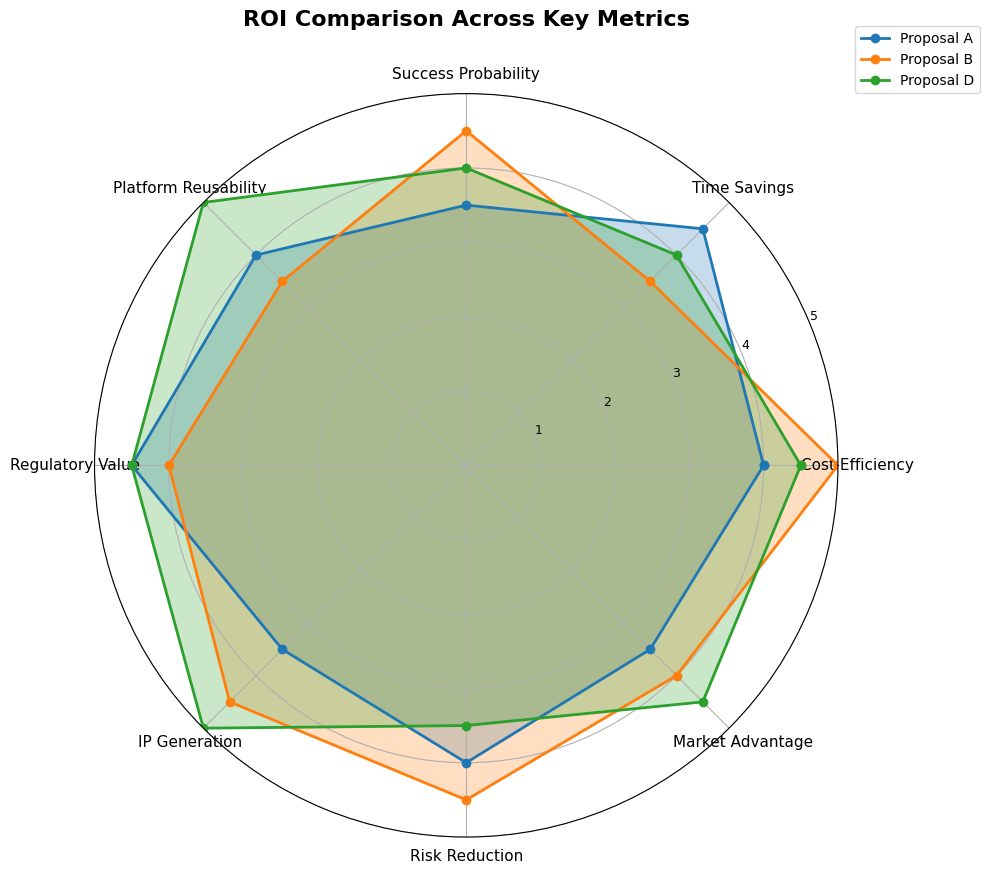

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# ROI metrics for each proposal
roi_metrics = {
    'Proposal A': {
        'Cost Efficiency': 4.0,  # $18M vs $70-90M
        'Time Savings': 4.5,     # 2+ years faster
        'Success Probability': 3.5,  # Increased PTRS
        'Platform Reusability': 4.0,  # Other KRAS tumors
        'Regulatory Value': 4.5,     # FDA MIDD alignment
        'IP Generation': 3.5,        # Digital assets
        'Risk Reduction': 4.0,       # Virtual de-risking
        'Market Advantage': 3.5      # First-mover
    },
    'Proposal B': {
        'Cost Efficiency': 5.0,  # $8.5M vs $50-100M
        'Time Savings': 3.5,     # 6 months Phase I reduction
        'Success Probability': 4.5,  # 20% to 45% success
        'Platform Reusability': 3.5,  # Adaptable platform
        'Regulatory Value': 4.0,     # MIDD pilot
        'IP Generation': 4.5,        # Licensable asset
        'Risk Reduction': 4.5,       # $40M savings
        'Market Advantage': 4.0      # $2B+ opportunity
    },
    'Proposal D': {
        'Cost Efficiency': 4.5,  # $10.5M with 4x efficiency
        'Time Savings': 4.0,     # 6-9 months IND acceleration
        'Success Probability': 4.0,  # 8% to 20% PTRS
        'Platform Reusability': 5.0,  # Asset-independent
        'Regulatory Value': 4.5,     # Pre-agreed credibility
        'IP Generation': 5.0,        # Rich IP moat
        'Risk Reduction': 3.5,       # Front-loaded knowledge
        'Market Advantage': 4.5      # First-mover MIDD
    }
}

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Set up the radar chart
categories = list(roi_metrics['Proposal A'].keys())
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot each proposal
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, (proposal, metrics) in enumerate(roi_metrics.items()):
    values = list(metrics.values())
    values += values[:1]

    ax.plot(angles, values, 'o-', linewidth=2, label=proposal, color=colors[idx])
    ax.fill(angles, values, alpha=0.25, color=colors[idx])

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=9)
ax.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('ROI Comparison Across Key Metrics', size=16, fontweight='bold', y=1.08)
plt.tight_layout()
plt.show()

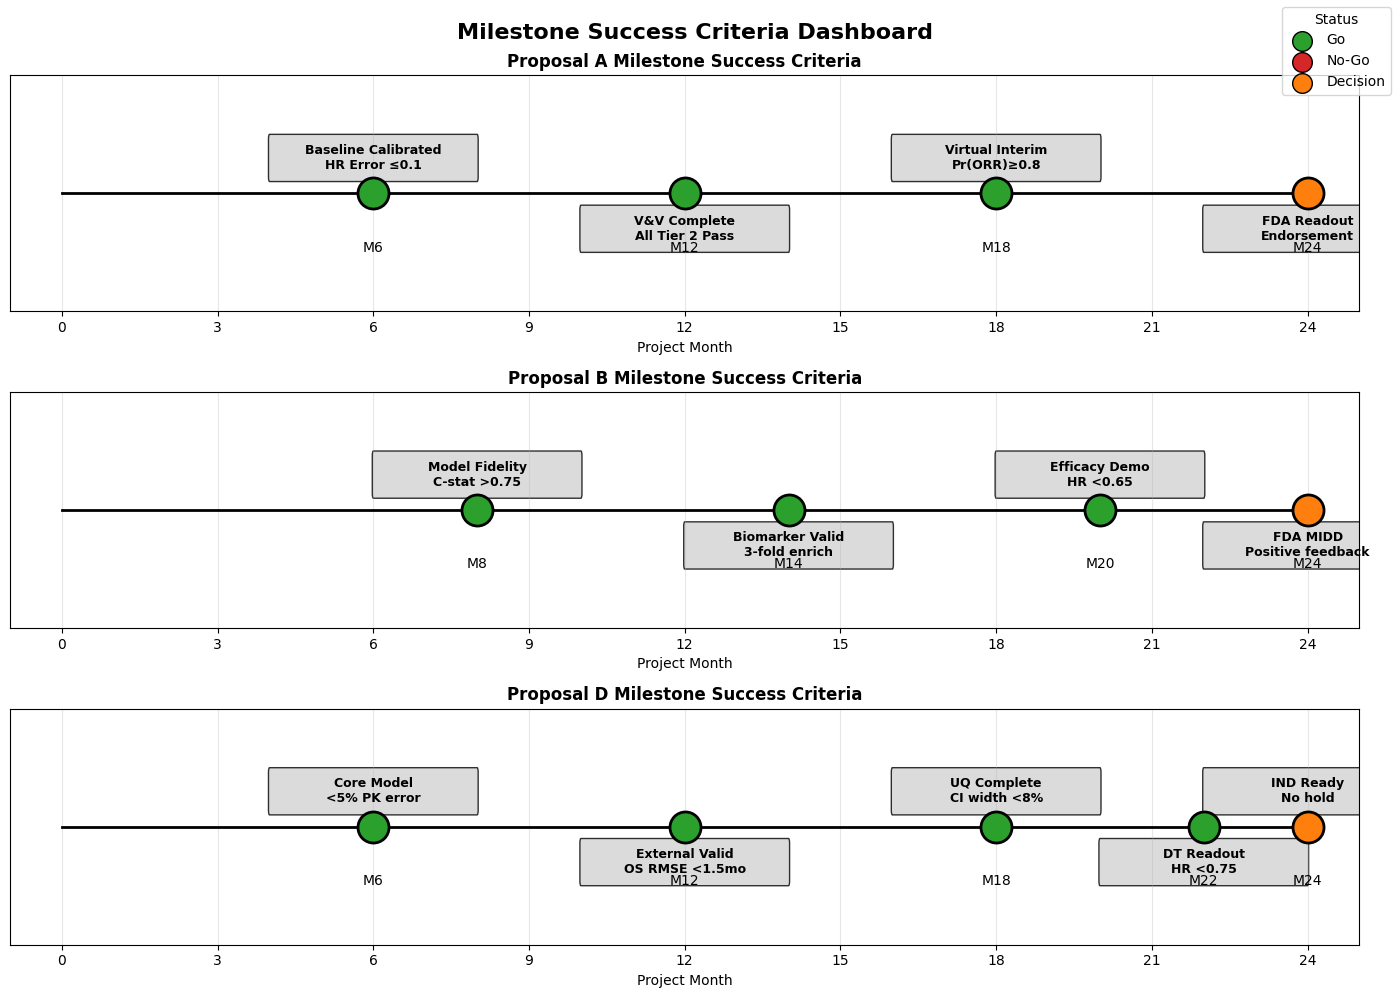

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Milestone data for each proposal
milestones = {
    'Proposal A': [
        {'Month': 6, 'Milestone': 'Baseline Calibrated', 'Metric': 'HR Error ≤0.1', 'Status': 'Go'},
        {'Month': 12, 'Milestone': 'V&V Complete', 'Metric': 'All Tier 2 Pass', 'Status': 'Go'},
        {'Month': 18, 'Milestone': 'Virtual Interim', 'Metric': 'Pr(ORR)≥0.8', 'Status': 'Go'},
        {'Month': 24, 'Milestone': 'FDA Readout', 'Metric': 'Endorsement', 'Status': 'Decision'}
    ],
    'Proposal B': [
        {'Month': 8, 'Milestone': 'Model Fidelity', 'Metric': 'C-stat >0.75', 'Status': 'Go'},
        {'Month': 14, 'Milestone': 'Biomarker Valid', 'Metric': '3-fold enrich', 'Status': 'Go'},
        {'Month': 20, 'Milestone': 'Efficacy Demo', 'Metric': 'HR <0.65', 'Status': 'Go'},
        {'Month': 24, 'Milestone': 'FDA MIDD', 'Metric': 'Positive feedback', 'Status': 'Decision'}
    ],
    'Proposal D': [
        {'Month': 6, 'Milestone': 'Core Model', 'Metric': '<5% PK error', 'Status': 'Go'},
        {'Month': 12, 'Milestone': 'External Valid', 'Metric': 'OS RMSE <1.5mo', 'Status': 'Go'},
        {'Month': 18, 'Milestone': 'UQ Complete', 'Metric': 'CI width <8%', 'Status': 'Go'},
        {'Month': 22, 'Milestone': 'DT Readout', 'Metric': 'HR <0.75', 'Status': 'Go'},
        {'Month': 24, 'Milestone': 'IND Ready', 'Metric': 'No hold', 'Status': 'Decision'}
    ]
}

fig, axes = plt.subplots(3, 1, figsize=(14, 10))
colors = {'Go': '#2ca02c', 'No-Go': '#d62728', 'Decision': '#ff7f0e'}

for ax, (proposal, miles) in zip(axes, milestones.items()):
    # Create timeline
    ax.plot([0, 24], [0.5, 0.5], 'k-', linewidth=2)

    for idx, m in enumerate(miles):
        # Plot milestone marker
        marker_color = colors[m['Status']]
        ax.scatter(m['Month'], 0.5, s=500, c=marker_color,
                  edgecolors='black', linewidth=2, zorder=3)

        # Add milestone details
        y_offset = 0.15 if idx % 2 == 0 else -0.15

        # Milestone box
        rect = patches.FancyBboxPatch((m['Month']-2, 0.5+y_offset-0.08),
                                     4, 0.16, boxstyle="round,pad=0.02",
                                     facecolor='lightgray', edgecolor='black',
                                     alpha=0.8)
        ax.add_patch(rect)

        # Add text
        ax.text(m['Month'], 0.5+y_offset, f"{m['Milestone']}\n{m['Metric']}",
               ha='center', va='center', fontsize=9, fontweight='bold')

        # Add month label
        ax.text(m['Month'], 0.3, f"M{m['Month']}", ha='center', va='top',
               fontsize=10)

        # Connect to timeline
        ax.plot([m['Month'], m['Month']], [0.45, 0.55], 'k-', linewidth=1)

    ax.set_xlim(-1, 25)
    ax.set_ylim(0, 1)
    ax.set_xticks(range(0, 25, 3))
    ax.set_xticklabels([f'{i}' for i in range(0, 25, 3)])
    ax.set_xlabel('Project Month', fontsize=10)
    ax.set_yticks([])
    ax.set_title(f'{proposal} Milestone Success Criteria',
                fontsize=12, fontweight='bold')
    ax.grid(True, axis='x', alpha=0.3)

# Add legend
legend_elements = [plt.scatter([], [], s=200, c=colors[status],
                              edgecolors='black', label=status)
                  for status in colors.keys()]
fig.legend(handles=legend_elements, loc='upper right', title='Status')

plt.suptitle('Milestone Success Criteria Dashboard', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

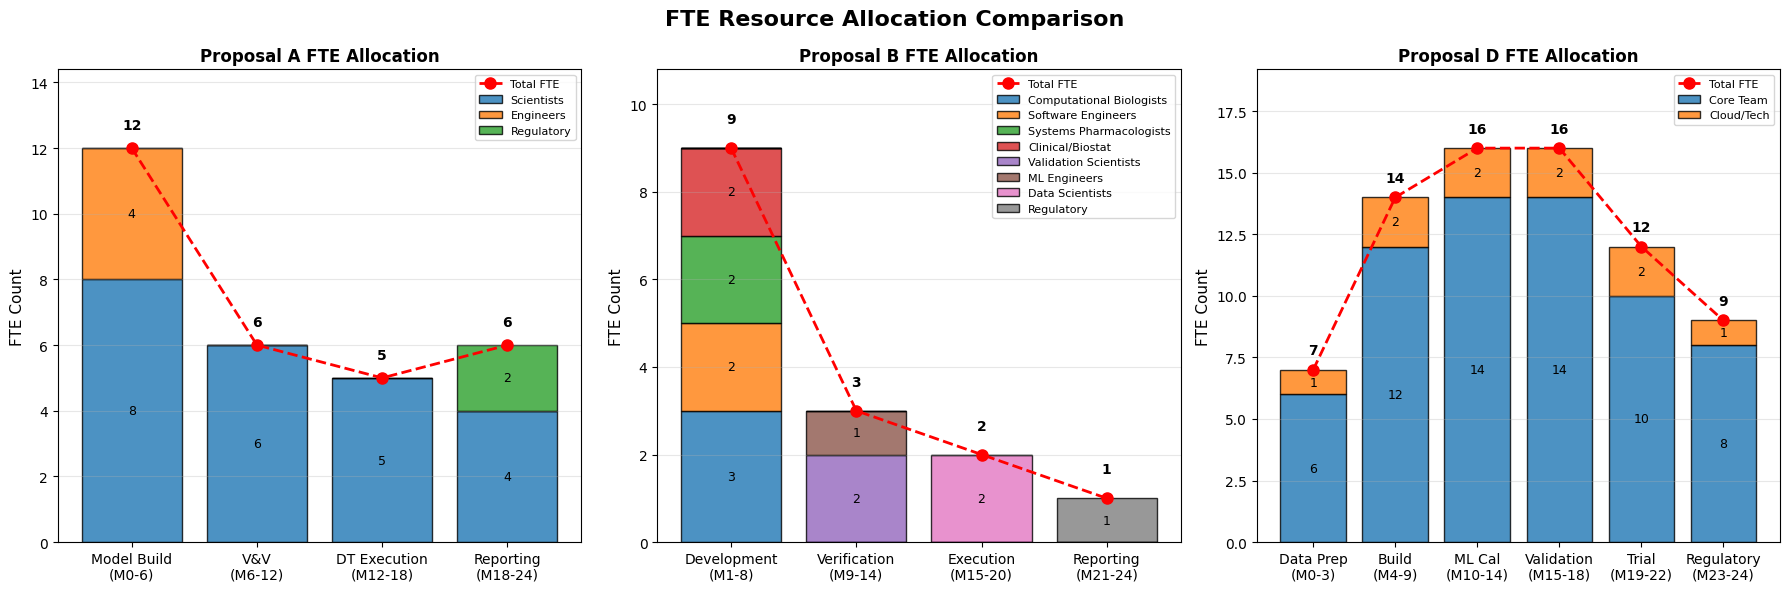

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# FTE data across project phases
fte_data = {
    'Proposal A': {
        'Scientists': [8, 6, 5, 4],
        'Engineers': [4, 0, 0, 0],
        'Regulatory': [0, 0, 0, 2],
        'Phases': ['Model Build\n(M0-6)', 'V&V\n(M6-12)',
                  'DT Execution\n(M12-18)', 'Reporting\n(M18-24)']
    },
    'Proposal B': {
        'Computational Biologists': [3, 0, 0, 0],
        'Software Engineers': [2, 0, 0, 0],
        'Systems Pharmacologists': [2, 0, 0, 0],
        'Clinical/Biostat': [2, 0, 0, 0],
        'Validation Scientists': [0, 2, 0, 0],
        'ML Engineers': [0, 1, 0, 0],
        'Data Scientists': [0, 0, 2, 0],
        'Regulatory': [0, 0, 0, 1],
        'Phases': ['Development\n(M1-8)', 'Verification\n(M9-14)',
                  'Execution\n(M15-20)', 'Reporting\n(M21-24)']
    },
    'Proposal D': {
        'Core Team': [6, 12, 14, 14, 10, 8],
        'Cloud/Tech': [1, 2, 2, 2, 2, 1],
        'Phases': ['Data Prep\n(M0-3)', 'Build\n(M4-9)', 'ML Cal\n(M10-14)',
                  'Validation\n(M15-18)', 'Trial\n(M19-22)', 'Regulatory\n(M23-24)']
    }
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (proposal, data) in zip(axes, fte_data.items()):
    phases = data['Phases']

    # Prepare data for stacking
    bottom = np.zeros(len(phases))
    colors = plt.cm.tab10(np.linspace(0, 1, 10))

    # Plot stacked bars
    role_idx = 0
    for role, values in data.items():
        if role != 'Phases':
            # Ensure values match phases length
            if len(values) < len(phases):
                values = values + [0] * (len(phases) - len(values))
            elif len(values) > len(phases):
                values = values[:len(phases)]

            ax.bar(phases, values, bottom=bottom, label=role,
                  color=colors[role_idx % len(colors)], alpha=0.8,
                  edgecolor='black', linewidth=1)

            # Add value labels
            for i, (phase, val) in enumerate(zip(phases, values)):
                if val > 0:
                    ax.text(i, bottom[i] + val/2, f'{val}',
                           ha='center', va='center', fontsize=9)

            bottom += values
            role_idx += 1

    # Add total FTE line
    ax.plot(range(len(phases)), bottom, 'r--', linewidth=2,
           marker='o', markersize=8, label='Total FTE')

    # Add total labels
    for i, total in enumerate(bottom):
        ax.text(i, total + 0.5, f'{total:.0f}', ha='center', va='bottom',
               fontsize=10, fontweight='bold')

    ax.set_ylabel('FTE Count', fontsize=11)
    ax.set_title(f'{proposal} FTE Allocation', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, axis='y', alpha=0.3)
    ax.set_ylim(0, max(bottom) * 1.2)

plt.suptitle('FTE Resource Allocation Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

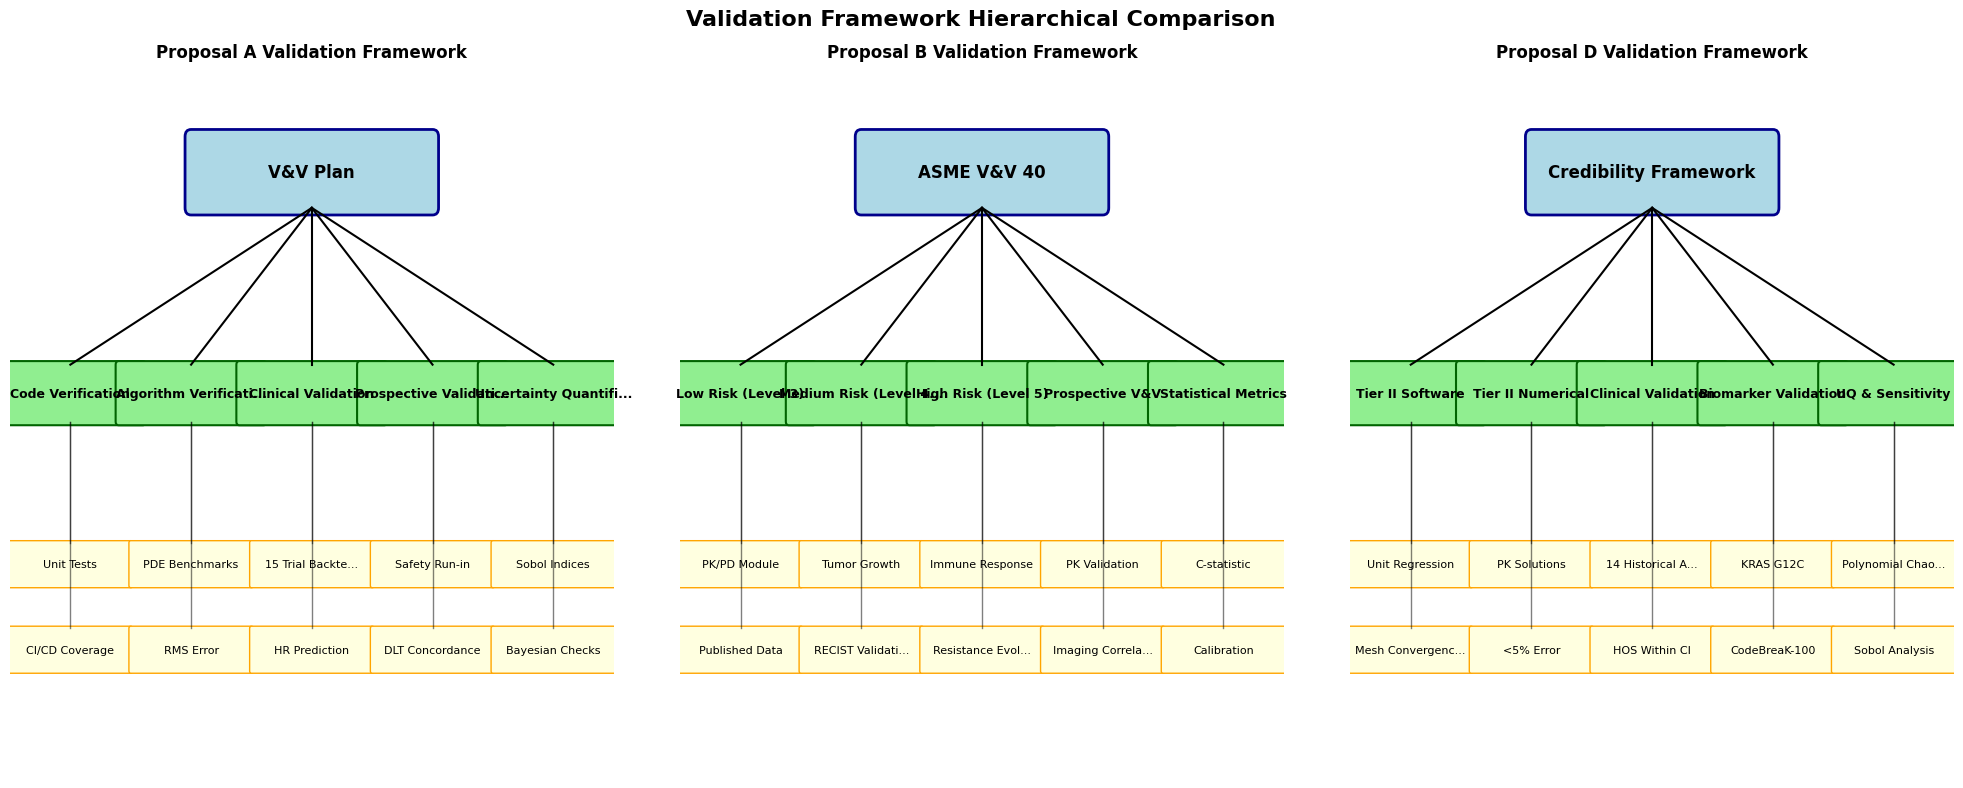

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np

# Validation hierarchy for each proposal
validation_frameworks = {
    'Proposal A': {
        'V&V Plan': {
            'Code Verification': ['Unit Tests', 'CI/CD Coverage'],
            'Algorithm Verification': ['PDE Benchmarks', 'RMS Error'],
            'Clinical Validation': ['15 Trial Backtests', 'HR Prediction'],
            'Prospective Validation': ['Safety Run-in', 'DLT Concordance'],
            'Uncertainty Quantification': ['Sobol Indices', 'Bayesian Checks']
        }
    },
    'Proposal B': {
        'ASME V&V 40': {
            'Low Risk (Level 3)': ['PK/PD Module', 'Published Data'],
            'Medium Risk (Level 4)': ['Tumor Growth', 'RECIST Validation'],
            'High Risk (Level 5)': ['Immune Response', 'Resistance Evolution'],
            'Prospective V&V': ['PK Validation', 'Imaging Correlation', 'Organoid Testing'],
            'Statistical Metrics': ['C-statistic', 'Calibration', 'Decision Curves']
        }
    },
    'Proposal D': {
        'Credibility Framework': {
            'Tier II Software': ['Unit Regression', 'Mesh Convergence'],
            'Tier II Numerical': ['PK Solutions', '<5% Error'],
            'Clinical Validation': ['14 Historical Arms', 'HOS Within CI'],
            'Biomarker Validation': ['KRAS G12C', 'CodeBreaK-100'],
            'UQ & Sensitivity': ['Polynomial Chaos', 'Sobol Analysis']
        }
    }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for ax, (proposal, framework) in zip(axes, validation_frameworks.items()):
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

    # Root node
    root_name = list(framework.keys())[0]
    root_box = FancyBboxPatch((3, 8), 4, 1, boxstyle="round,pad=0.1",
                              facecolor='lightblue', edgecolor='darkblue',
                              linewidth=2)
    ax.add_patch(root_box)
    ax.text(5, 8.5, root_name, ha='center', va='center',
           fontsize=12, fontweight='bold')

    # Branch nodes
    branches = framework[root_name]
    num_branches = len(branches)
    x_positions = np.linspace(1, 9, num_branches)

    for i, (branch, items) in enumerate(branches.items()):
        x = x_positions[i]

        # Branch box
        branch_box = FancyBboxPatch((x-1.2, 5), 2.4, 0.8,
                                   boxstyle="round,pad=0.05",
                                   facecolor='lightgreen',
                                   edgecolor='darkgreen',
                                   linewidth=1.5)
        ax.add_patch(branch_box)
        ax.text(x, 5.4, branch[:20] + ('...' if len(branch) > 20 else ''),
               ha='center', va='center', fontsize=9, fontweight='bold')

        # Connect to root
        ax.plot([5, x], [8, 5.8], 'k-', linewidth=1.5)

        # Leaf nodes
        for j, item in enumerate(items[:2]):  # Show max 2 items
            y = 3 - j * 1.2

            # Leaf box
            leaf_box = FancyBboxPatch((x-1, y-0.3), 2, 0.6,
                                     boxstyle="round,pad=0.03",
                                     facecolor='lightyellow',
                                     edgecolor='orange',
                                     linewidth=1)
            ax.add_patch(leaf_box)
            ax.text(x, y, item[:15] + ('...' if len(item) > 15 else ''),
                   ha='center', va='center', fontsize=8)

            # Connect to branch
            ax.plot([x, x], [5, y+0.3], 'k-', linewidth=1, alpha=0.5)

    ax.set_title(f'{proposal} Validation Framework',
                fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle('Validation Framework Hierarchical Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

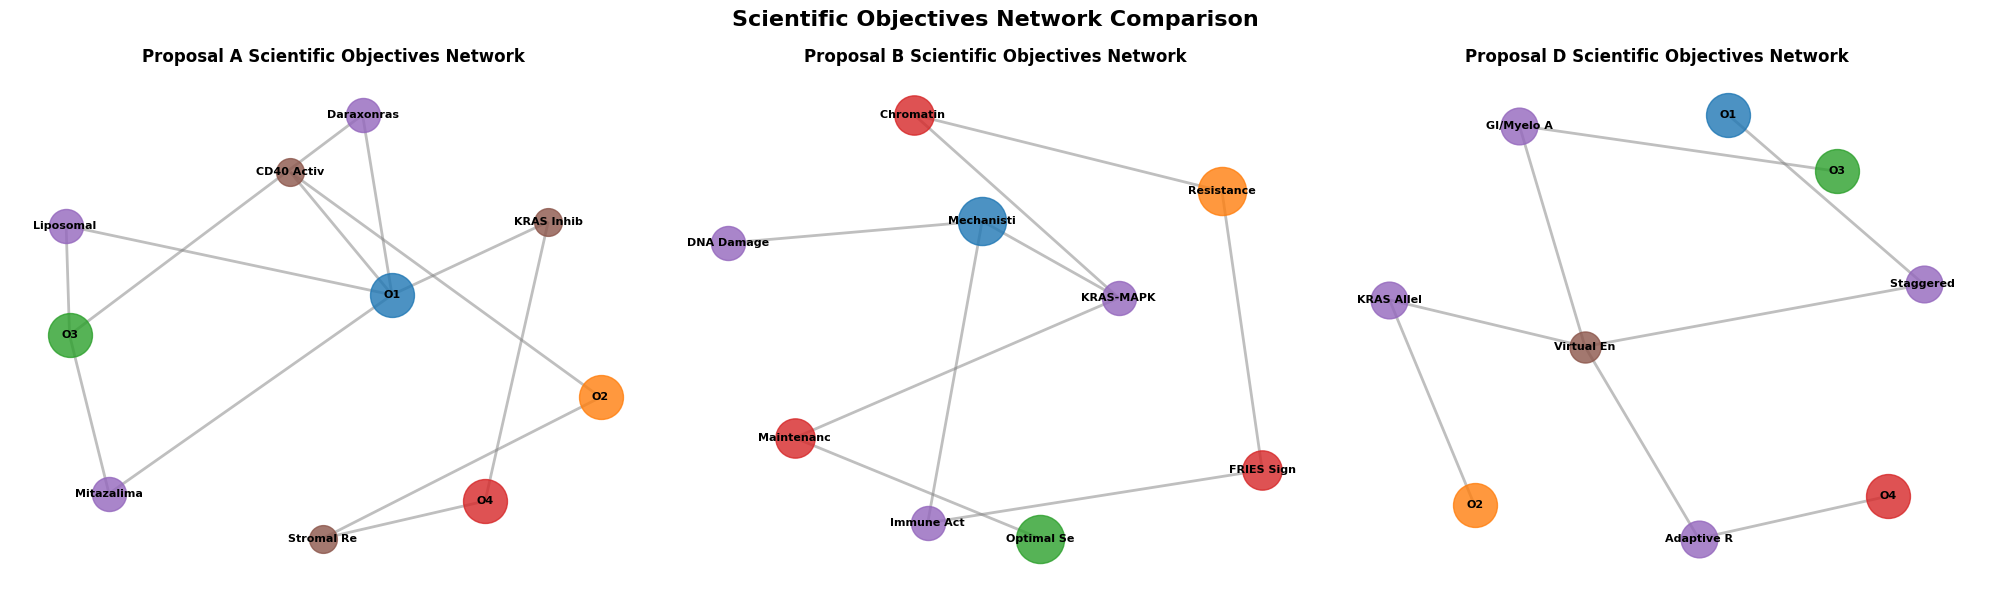

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Scientific objectives and their relationships
objectives_data = {
    'Proposal A': {
        'nodes': {
            'O1: Triplet Synergy': {'color': '#1f77b4', 'size': 1000},
            'O2: TME Bottlenecks': {'color': '#ff7f0e', 'size': 1000},
            'O3: Dose-Toxicity': {'color': '#2ca02c', 'size': 1000},
            'O4: Biomarker Enrichment': {'color': '#d62728', 'size': 1000},
            'Daraxonrasib': {'color': '#9467bd', 'size': 600},
            'Mitazalimab': {'color': '#9467bd', 'size': 600},
            'Liposomal Irinotecan': {'color': '#9467bd', 'size': 600},
            'KRAS Inhibition': {'color': '#8c564b', 'size': 400},
            'CD40 Activation': {'color': '#8c564b', 'size': 400},
            'Stromal Remodeling': {'color': '#8c564b', 'size': 400}
        },
        'edges': [
            ('Daraxonrasib', 'O1: Triplet Synergy'),
            ('Mitazalimab', 'O1: Triplet Synergy'),
            ('Liposomal Irinotecan', 'O1: Triplet Synergy'),
            ('O1: Triplet Synergy', 'KRAS Inhibition'),
            ('O1: Triplet Synergy', 'CD40 Activation'),
            ('O2: TME Bottlenecks', 'Stromal Remodeling'),
            ('O2: TME Bottlenecks', 'CD40 Activation'),
            ('O3: Dose-Toxicity', 'Daraxonrasib'),
            ('O3: Dose-Toxicity', 'Mitazalimab'),
            ('O3: Dose-Toxicity', 'Liposomal Irinotecan'),
            ('O4: Biomarker Enrichment', 'KRAS Inhibition'),
            ('O4: Biomarker Enrichment', 'Stromal Remodeling')
        ]
    },
    'Proposal B': {
        'nodes': {
            'Mechanistic Synergy': {'color': '#1f77b4', 'size': 1200},
            'Resistance Mechanisms': {'color': '#ff7f0e', 'size': 1200},
            'Optimal Sequencing': {'color': '#2ca02c', 'size': 1200},
            'FRIES Signature': {'color': '#d62728', 'size': 800},
            'Chromatin Defects': {'color': '#d62728', 'size': 800},
            'Maintenance Therapy': {'color': '#d62728', 'size': 800},
            'KRAS-MAPK': {'color': '#9467bd', 'size': 600},
            'Immune Activation': {'color': '#9467bd', 'size': 600},
            'DNA Damage': {'color': '#9467bd', 'size': 600}
        },
        'edges': [
            ('Mechanistic Synergy', 'KRAS-MAPK'),
            ('Mechanistic Synergy', 'Immune Activation'),
            ('Mechanistic Synergy', 'DNA Damage'),
            ('Resistance Mechanisms', 'Chromatin Defects'),
            ('Resistance Mechanisms', 'FRIES Signature'),
            ('Optimal Sequencing', 'Maintenance Therapy'),
            ('FRIES Signature', 'Immune Activation'),
            ('Chromatin Defects', 'KRAS-MAPK'),
            ('Maintenance Therapy', 'KRAS-MAPK')
        ]
    },
    'Proposal D': {
        'nodes': {
            'O1: Schedule Optimization': {'color': '#1f77b4', 'size': 1000},
            'O2: Molecular Responders': {'color': '#ff7f0e', 'size': 1000},
            'O3: Toxicity Risk': {'color': '#2ca02c', 'size': 1000},
            'O4: Dose Finding': {'color': '#d62728', 'size': 1000},
            'Staggered Dosing': {'color': '#9467bd', 'size': 700},
            'KRAS Allele MAF': {'color': '#9467bd', 'size': 700},
            'GI/Myelo AEs': {'color': '#9467bd', 'size': 700},
            'Adaptive RP2D': {'color': '#9467bd', 'size': 700},
            'Virtual Endpoints': {'color': '#8c564b', 'size': 500}
        },
        'edges': [
            ('O1: Schedule Optimization', 'Staggered Dosing'),
            ('O2: Molecular Responders', 'KRAS Allele MAF'),
            ('O3: Toxicity Risk', 'GI/Myelo AEs'),
            ('O4: Dose Finding', 'Adaptive RP2D'),
            ('Staggered Dosing', 'Virtual Endpoints'),
            ('KRAS Allele MAF', 'Virtual Endpoints'),
            ('GI/Myelo AEs', 'Virtual Endpoints'),
            ('Adaptive RP2D', 'Virtual Endpoints')
        ]
    }
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, (proposal, data) in zip(axes, objectives_data.items()):
    # Create graph
    G = nx.Graph()
    G.add_edges_from(data['edges'])

    # Layout
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

    # Draw nodes
    for node, properties in data['nodes'].items():
        if node in G.nodes():
            nx.draw_networkx_nodes(G, pos, nodelist=[node],
                                 node_color=properties['color'],
                                 node_size=properties['size'],
                                 ax=ax, alpha=0.8)

    # Draw edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray',
                          width=2, alpha=0.5)

    # Draw labels
    labels = {node: node.split(':')[0] if ':' in node else node[:10]
              for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=8,
                           font_weight='bold')

    ax.set_title(f'{proposal} Scientific Objectives Network',
                fontsize=12, fontweight='bold')
    ax.axis('off')

plt.suptitle('Scientific Objectives Network Comparison',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()